In [1]:
# Python
import itertools
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from autots import AutoTS
import matplotlib.pyplot as plt 
import funciones
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [2]:
df_main = pd.read_excel("https://raw.githubusercontent.com/carrenogf/MCD-Series-Temporales/main/dataset/series_diarias.xlsx")
df_main = df_main.sort_values("FECHA",ascending=True)
df_main.set_index("FECHA", inplace=True)
df_copa = df_main["CHU_COPA_AJUST"].dropna()
df_recprop = df_main["CHU_REC_PROPIOS_AJUST"].dropna()
df_regal = df_main["CHU_REGALIAS_AJUST"].dropna()
dataframes = [df_copa, df_recprop, df_regal]
for i in range(len(dataframes)):
  dataframes[i] = dataframes[i].reindex(pd.date_range(start=dataframes[i].index.min(), end=dataframes[i].index.max(), freq='B'))
  dataframes[i] = dataframes[i].fillna(0)
    
titulos = ["CHU_COPA_AJUST", "CHU_REC_PROPIOS_AJUST", "CHU_REGALIAS_AJUST"]

In [3]:
# TRAIN TEST
n_test = 30
train_copa = dataframes[0].iloc[:-n_test]
test_copa = dataframes[0].iloc[-n_test:]
print(f"Coparticipacion: train({train_copa.shape}), test({test_copa.shape})")

train_recursos = dataframes[1].iloc[:-n_test]
test_recursos = dataframes[1].iloc[-n_test:]
print(f"Recursos: train({train_recursos.shape}), test({test_recursos.shape})")

train_regalias = dataframes[2].iloc[:-n_test]
test_regalias = dataframes[2].iloc[-n_test:]
print(f"Regalias: train({train_regalias.shape}), test({test_regalias.shape})")

dataframes_train = [ train_copa, train_recursos, train_regalias ]
dataframes_test = [ test_copa, test_recursos, test_regalias ]

Coparticipacion: train((1730,)), test((30,))
Recursos: train((2187,)), test((30,))
Regalias: train((2176,)), test((30,))


In [4]:
results_train_test = []
predictions_test = []
for i, df in enumerate(dataframes_train):
    df_train = df
    df_test = dataframes_test[i]
    
    model = AutoTS(
        forecast_length=len(dataframes_test[i]),
        frequency="B",
        prediction_interval=0.95,
        ensemble=None,
        models_mode='deep',
        model_list = 'superfast',
        max_generations=10,   # intenta optimizar el modelo a traves de 10 iteraciones de ajuste.
        num_validations=3,
        no_negatives=True,
        n_jobs='auto')
    modelAutoTS = model.fit(df_train)
    # Find the best parameters
    
    fechas = pd.date_range(start=df_test.index.min(), end=df_test.index.max(), freq='B')
    pred_test = model.predict(forecast_length=len(fechas)).forecast
    predictions_test.append(pred_test)
    # Cálculo del MSE en el conjunto de prueba
    mape_test = mean_absolute_percentage_error(df_test, pred_test)
    mape_mean = mean_absolute_percentage_error(df_test, [df_test.mean()] * len(df_test))
    mse_test = mean_squared_error(df_test, pred_test)
    mae_test = mean_absolute_error(df_test, pred_test)
    rmse = np.sqrt(mean_squared_error(df_test, pred_test))
    results_train_test.append({
        "model": modelAutoTS,
        "name": df_train.name,
        "len_train": len(df_train),
        "len_test": len(df_test),
        "mape_test": mape_test,
        "mse_test":mse_test,
        "mape_mean": mape_mean,
        "mae_test": mae_test,
        "rmse": rmse
    })



Using 3 cpus for n_jobs.
Data frequency is: B, used frequency is: B
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model GLS in generation 0 of 10
Model Number: 5 with model GLS in generation 0 of 10
Model Number: 6 with model LastValueNaive in generation 0 of 10
Model Number: 7 with model LastValueNaive in generation 0 of 10
Model Number: 8 with model LastValueNaive in generation 0 of 10
Model Number: 9 with model LastValueNaive in generation 0 of 10
Model Number: 10 with model SeasonalNaive in generation 0 of 10
Model Number: 11 with model SeasonalNaive in generation 0 of 10
Model Number: 12 with model SeasonalNaive in generation 0 of 10
Model Number: 13 with model ConstantNaive in generation 0 of 10
Model Number: 14 with model SeasonalNaive in generation 0 of 10
Model Number: 15 with model SectionalMotif in gen

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 24 with model SeasonalNaive in generation 0 of 10
Model Number: 25 with model SeasonalityMotif in generation 0 of 10
Model Number: 26 with model SectionalMotif in generation 0 of 10
Model Number: 27 with model LastValueNaive in generation 0 of 10
Model Number: 28 with model SectionalMotif in generation 0 of 10
Model Number: 29 with model SectionalMotif in generation 0 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Template Eval Error: Exception("Transformer SinTrend failed on fit from params fake_date {'0': {}, '1': {}, '2': {}, '3': {'lag_1': 12, 'method': 'LastValue'}, '4': {'sigma': 0.5, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': 9, 'min_samples_split': 0.05}}, 'datepart_method': 'simple', 'polynomial_degree': 2, 'transform_dict': None, 'holiday_countries_used': False, 'lags': None, 'forward_lags': None}, 'holiday_params': None, 'trend_method': 'rolling_mean'}}") in model 29 in generation 0: SectionalMotif
Model Number: 30 with model ConstantNaive in generation 0 of 10
Model Number: 31 with model SeasonalityMotif in generation 0 of 10
Model Number: 32 with model SectionalMotif in generation 0 of 10
Model Number: 33 with model SeasonalityMotif in generation 0 of 10
Model Number: 34 with model SeasonalityMotif in generation 0 of 10
Model Number: 35 with model LastValueNaive in generation 0 

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting 

Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 65 in generation 1: SectionalMotif
Model Number: 66 with model SectionalMotif in generation 1 of 10
Model Number: 67 with model AverageValueNaive in generation 1 of 10
Model Number: 68 with model LastValueNaive in generation 1 of 10
Model Number: 69 with model SeasonalNaive in generation 1 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1132: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp.replace(replace_dict).astype(float).fillna(0),
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)

Model Number: 70 with model SeasonalityMotif in generation 1 of 10
Model Number: 71 with model SeasonalityMotif in generation 1 of 10
Model Number: 72 with model SectionalMotif in generation 1 of 10
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params akima {'0': {}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '3': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 2, 'eta': 0.01, 'min_child_weight': 1, 'subsample': 1, 'colsample_bylevel': 1, 'reg_alpha': 0, 'reg_lambda': 1, 'n_estimators': 100, 'quantile_alpha': 0.5, 'tree_method': 'hist'}, 'datepart_method': 'expanded_binarized'}, 'fillna': None}, '4': {'lag_1': 28, 'method': 'LastValue'}}") in model 72 in generation 1: SectionalMotif
Model Number: 73 with model SeasonalityMo

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 77 with model SectionalMotif in generation 1 of 10
Model Number: 78 with model LastValueNaive in generation 1 of 10
Model Number: 79 with model AverageValueNaive in generation 1 of 10
Model Number: 80 with model GLS in generation 1 of 10
Model Number: 81 with model SeasonalNaive in generation 1 of 10
Model Number: 82 with model LastValueNaive in generation 1 of 10
Model Number: 83 with model LastValueNaive in generation 1 of 10
Model Number: 84 with model SectionalMotif in generation 1 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean_24 {'0': {'output_distribution': 'uniform', 'n_quantiles': 1000}, '1': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '2': {}}") in model 84 in generation 1: SectionalMotif
Model Number: 85 with model SeasonalNaive in generation 1 of 10
Model Number: 86 with model SectionalMotif in generation 1 of 10
Model Number: 87 with model SectionalMotif in generation 1 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.45388e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 142 with model SeasonalNaive in generation 3 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params quadratic {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '1': {}, '2': {}, '3': {}}") in model 142 in generation 3: SeasonalNaive
Model Number: 143 with model SeasonalityMotif in generation 3 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params median {'0': {'det_order': -1, 'k_ar_diff': 1}, '1': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 3, 'threshold_method': 'mean'}, '2': {}, '3': {'fillna': 'one', 'center': 'zero'}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'mean'}, '5': {}}") in model 143 in generation 3: SeasonalityMotif
Model Number: 144 with model ConstantNaive in generation 3 of 10
Model Number: 145 with model Sect

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 160 with model AverageValueNaive in generation 4 of 10
Model Number: 161 with model GLS in generation 4 of 10
Model Number: 162 with model AverageValueNaive in generation 4 of 10
Model Number: 163 with model SeasonalityMotif in generation 4 of 10
Model Number: 164 with model SeasonalityMotif in generation 4 of 10
Model Number: 165 with model AverageValueNaive in generation 4 of 10
Model Number: 166 with model SeasonalityMotif in generation 4 of 10
Model Number: 167 with model LastValueNaive in generation 4 of 10
Model Number: 168 with model SectionalMotif in generation 4 of 10
Model Number: 169 with model SectionalMotif in generation 4 of 10
Model Number: 170 with model SeasonalityMotif in generation 4 of 10
Model Number: 171 with model SectionalMotif in generation 4 of 10
Model Number: 172 with model LastValueNaive in generation 4 of 10
Model Number: 173 with model AverageValueNaive in generation 4 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.45388e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 174 with model SeasonalityMotif in generation 4 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params akima {'0': {}, '1': {'output_distribution': 'uniform', 'n_quantiles': 1000}, '2': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}}") in model 174 in generation 4: SeasonalityMotif
Model Number: 175 with model SeasonalityMotif in generation 4 of 10
Model Number: 176 with model SectionalMotif in generation 4 of 10
Model Number: 177 with model SeasonalityMotif in generation 4 of 10
Model Number: 178 with model AverageValueNaive in generation 4 of 10
Model Number: 179 with model AverageValueNaive in generation 4 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.45388e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 180 with model SeasonalityMotif in generation 4 of 10
Model Number: 181 with model LastValueNaive in generation 4 of 10
Model Number: 182 with model SeasonalityMotif in generation 4 of 10
Model Number: 183 with model AverageValueNaive in generation 4 of 10
Model Number: 184 with model ConstantNaive in generation 4 of 10
Model Number: 185 with model SectionalMotif in generation 4 of 10
Model Number: 186 with model LastValueNaive in generation 4 of 10
Model Number: 187 with model SectionalMotif in generation 4 of 10
Model Number: 188 with model SeasonalNaive in generation 4 of 10
Model Number: 189 with model ConstantNaive in generation 4 of 10
Model Number: 190 with model SeasonalityMotif in generation 4 of 10
Model Number: 191 with model SectionalMotif in generation 4 of 10
Model Number: 192 with model AverageValueNaive in generation 4 of 10
Model Number: 193 with model SectionalMotif in generation 4 of 10
Model Number: 194 with model SeasonalNaive in generation 4 of 10
Ne

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 232 with model SectionalMotif in generation 6 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean {'0': {'rows': 4, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '1': {}, '2': {'det_order': 1, 'k_ar_diff': 2}, '3': {'method': 'EE', 'method_params': {'contamination': 0.02, 'assume_centered': False, 'support_fraction': None}, 'fillna': 'rolling_mean_24', 'transform_dict': None, 'isolated_only': False}}") in model 232 in generation 6: SectionalMotif
Model Number: 233 with model SeasonalityMotif in generation 6 of 10
Model Number: 234 with model AverageValueNaive in generation 6 of 10
Model Number: 235 with model AverageValueNaive in generation 6 of 10
Model Number: 236 with model SectionalMotif in generation 6 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 236 in generation 6: SectionalMot

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.45388e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 257 with model SeasonalityMotif in generation 7 of 10
Model Number: 258 with model SectionalMotif in generation 7 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.45388e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 259 with model AverageValueNaive in generation 7 of 10
Model Number: 260 with model SectionalMotif in generation 7 of 10
Model Number: 261 with model SeasonalNaive in generation 7 of 10
Model Number: 262 with model SeasonalityMotif in generation 7 of 10
Model Number: 263 with model SeasonalityMotif in generation 7 of 10
Model Number: 264 with model SeasonalNaive in generation 7 of 10
Model Number: 265 with model SeasonalityMotif in generation 7 of 10
Model Number: 266 with model AverageValueNaive in generation 7 of 10
Model Number: 267 with model SeasonalityMotif in generation 7 of 10
Model Number: 268 with model SeasonalityMotif in generation 7 of 10
Model Number: 269 with model SectionalMotif in generation 7 of 10
Model Number: 270 with model SeasonalityMotif in generation 7 of 10
Model Number: 271 with model LastValueNaive in generation 7 of 10
Model Number: 272 with model SeasonalityMotif in generation 7 of 10
Model Number: 273 with model LastValueNaive in generation 

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 318 with model SectionalMotif in generation 9 of 10
Model Number: 319 with model LastValueNaive in generation 9 of 10
Model Number: 320 with model SectionalMotif in generation 9 of 10
Model Number: 321 with model SectionalMotif in generation 9 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 321 in generation 9: SectionalMotif
Model Number: 322 with model GLS in generation 9 of 10
Model Number: 323 with model SeasonalityMotif in generation 9 of 10
Model Number: 324 with model AverageValueNaive in generation 9 of 10
Model Number: 325 with model SectionalMotif in generation 9 of 10
Model Number: 326 with model SeasonalNaive in generation 9 of 10
Model Number: 327 with model SeasonalityMotif in generation 9 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)


Model Number: 328 with model GLS in generation 9 of 10
Model Number: 329 with model SeasonalityMotif in generation 9 of 10
Model Number: 330 with model SeasonalityMotif in generation 9 of 10
Model Number: 331 with model SeasonalityMotif in generation 9 of 10
Model Number: 332 with model SectionalMotif in generation 9 of 10
Model Number: 333 with model SeasonalNaive in generation 9 of 10
Model Number: 334 with model AverageValueNaive in generation 9 of 10
New Generation: 10 of 10
Model Number: 335 with model SeasonalityMotif in generation 10 of 10
Model Number: 336 with model SeasonalityMotif in generation 10 of 10
Model Number: 337 with model SeasonalityMotif in generation 10 of 10
Template Eval Error: Exception("Transformer FastICA failed on fit from params zero {'0': {'rows': None, 'displacement_rows': 1, 'quantile': 1.0, 'decay_span': None}, '1': {}, '2': {'fillna': 'ffill', 'center': 'median'}, '3': {'algorithm': 'deflation', 'fun': 'exp', 'max_iter': 500, 'whiten': 'unit-variance'

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_fastica.py:626: RuntimeWarning: invalid value encountered in divide
  K = (u / d).T[:n_components]  # see (6.33) p.140


Model Number: 340 with model SeasonalNaive in generation 10 of 10
Model Number: 341 with model SectionalMotif in generation 10 of 10
Model Number: 342 with model SeasonalNaive in generation 10 of 10
Model Number: 343 with model AverageValueNaive in generation 10 of 10
Model Number: 344 with model SeasonalityMotif in generation 10 of 10
Model Number: 345 with model SectionalMotif in generation 10 of 10
Model Number: 346 with model AverageValueNaive in generation 10 of 10
Model Number: 347 with model AverageValueNaive in generation 10 of 10
Model Number: 348 with model SeasonalityMotif in generation 10 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params pchip {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '1': {'det_order': -1, 'k_ar_diff': 2}, '2': {'window_size': 90, 'alpha': 2.0, 'grouping_forward_limit': 2, 'max_level_shifts': 10, 'alignment': 'rolling_

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)


23 - AverageValueNaive with avg smape 96.99: 
Model Number: 24 of 53 with model SeasonalNaive for Validation 1
24 - SeasonalNaive with avg smape 100.32: 
Model Number: 25 of 53 with model AverageValueNaive for Validation 1
25 - AverageValueNaive with avg smape 101.78: 
Model Number: 26 of 53 with model AverageValueNaive for Validation 1
26 - AverageValueNaive with avg smape 101.91: 
Model Number: 27 of 53 with model AverageValueNaive for Validation 1
27 - AverageValueNaive with avg smape 101.91: 
Model Number: 28 of 53 with model SeasonalNaive for Validation 1
28 - SeasonalNaive with avg smape 104.64: 
Model Number: 29 of 53 with model AverageValueNaive for Validation 1
29 - AverageValueNaive with avg smape 102.6: 
Model Number: 30 of 53 with model SeasonalNaive for Validation 1
30 - SeasonalNaive with avg smape 105.0: 
Model Number: 31 of 53 with model SeasonalNaive for Validation 1
31 - SeasonalNaive with avg smape 122.43: 
Model Number: 32 of 53 with model SeasonalNaive for Validati

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)


22 - AverageValueNaive with avg smape 83.57: 
Model Number: 23 of 53 with model AverageValueNaive for Validation 2
23 - AverageValueNaive with avg smape 87.58: 
Model Number: 24 of 53 with model SeasonalNaive for Validation 2
24 - SeasonalNaive with avg smape 83.48: 
Model Number: 25 of 53 with model AverageValueNaive for Validation 2
25 - AverageValueNaive with avg smape 83.9: 
Model Number: 26 of 53 with model AverageValueNaive for Validation 2
26 - AverageValueNaive with avg smape 83.91: 
Model Number: 27 of 53 with model AverageValueNaive for Validation 2
27 - AverageValueNaive with avg smape 83.91: 
Model Number: 28 of 53 with model SeasonalNaive for Validation 2
28 - SeasonalNaive with avg smape 83.0: 
Model Number: 29 of 53 with model AverageValueNaive for Validation 2
29 - AverageValueNaive with avg smape 83.53: 
Model Number: 30 of 53 with model SeasonalNaive for Validation 2
30 - SeasonalNaive with avg smape 83.23: 
Model Number: 31 of 53 with model SeasonalNaive for Validati

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)


22 - AverageValueNaive with avg smape 82.25: 
Model Number: 23 of 53 with model AverageValueNaive for Validation 3
23 - AverageValueNaive with avg smape 81.77: 
Model Number: 24 of 53 with model SeasonalNaive for Validation 3
24 - SeasonalNaive with avg smape 80.16: 
Model Number: 25 of 53 with model AverageValueNaive for Validation 3
25 - AverageValueNaive with avg smape 81.53: 
Model Number: 26 of 53 with model AverageValueNaive for Validation 3
26 - AverageValueNaive with avg smape 81.53: 
Model Number: 27 of 53 with model AverageValueNaive for Validation 3
27 - AverageValueNaive with avg smape 81.53: 
Model Number: 28 of 53 with model SeasonalNaive for Validation 3
28 - SeasonalNaive with avg smape 80.47: 
Model Number: 29 of 53 with model AverageValueNaive for Validation 3
29 - AverageValueNaive with avg smape 81.54: 
Model Number: 30 of 53 with model SeasonalNaive for Validation 3
30 - SeasonalNaive with avg smape 82.02: 
Model Number: 31 of 53 with model SeasonalNaive for Valida

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\evaluator\auto_model.py:2462: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\evaluator\auto_model.py:2462: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(


Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model GLS in generation 0 of 10
Model Number: 5 with model GLS in generation 0 of 10
Model Number: 6 with model LastValueNaive in generation 0 of 10
Model Number: 7 with model LastValueNaive in generation 0 of 10
Model Number: 8 with model LastValueNaive in generation 0 of 10
Model Number: 9 with model LastValueNaive in generation 0 of 10
Model Number: 10 with model SeasonalNaive in generation 0 of 10
Model Number: 11 with model SeasonalNaive in generation 0 of 10
Model Number: 12 with model SeasonalNaive in generation 0 of 10
Model Number: 13 with model ConstantNaive in generation 0 of 10
Model Number: 14 with model SeasonalNaive in generation 0 of 10
Model Number: 15 with model SectionalMotif in generation 0 of 10
Model Number: 16 with model SectionalMotif in generation 0 of 10
Model Number: 17 with model SeasonalNaive in generatio

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 24 with model SeasonalNaive in generation 0 of 10
Model Number: 25 with model SeasonalityMotif in generation 0 of 10
Model Number: 26 with model SectionalMotif in generation 0 of 10
Model Number: 27 with model LastValueNaive in generation 0 of 10
Model Number: 28 with model SectionalMotif in generation 0 of 10
Model Number: 29 with model SectionalMotif in generation 0 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Template Eval Error: Exception("Transformer SinTrend failed on fit from params fake_date {'0': {}, '1': {}, '2': {}, '3': {'lag_1': 12, 'method': 'LastValue'}, '4': {'sigma': 0.5, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 1.0}}, 'datepart_method': 'simple', 'polynomial_degree': 2, 'transform_dict': None, 'holiday_countries_used': False, 'lags': None, 'forward_lags': None}, 'holiday_params': None, 'trend_method': 'rolling_mean'}}") in model 29 in generation 0: SectionalMotif
Model Number: 30 with model ConstantNaive in generation 0 of 10
Model Number: 31 with model SeasonalityMotif in generation 0 of 10
Model Number: 32 with model SectionalMotif in generation 0 of 10
Model Number: 33 with model SeasonalityMotif in generation 0 of 10
Model Number: 34 with model SeasonalityMotif in generation 0 of 10
Model Number: 35 with model LastValueNaive in generation 

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


Model Number: 65 with model GLS in generation 1 of 10
Model Number: 66 with model AverageValueNaive in generation 1 of 10
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params ffill {'0': {'regression_model': {'model': 'MLP', 'model_params': {'hidden_layer_sizes': [25, 50, 25], 'max_iter': 250, 'activation': 'tanh', 'solver': 'adam', 'early_stopping': False, 'learning_rate_init': 0.001, 'alpha': None}}, 'datepart_method': ['weekdayofmonth', 'common_fourier'], 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 2}}}, 'holiday_countries_used': True, 'lags': 2, 'forward_lags': None}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {}, '3': {}}") in model 66 in generation 1: AverageValueNaive
Model Number: 67 with model SectionalMotif in generation 1 of 10
Model Number: 68 with model SectionalMotif in generation 1 of 10
Model Number: 

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 108 with model GLS in generation 2 of 10
Model Number: 109 with model ConstantNaive in generation 2 of 10
Model Number: 110 with model LastValueNaive in generation 2 of 10
Model Number: 111 with model LastValueNaive in generation 2 of 10
Model Number: 112 with model ConstantNaive in generation 2 of 10
Model Number: 113 with model SeasonalNaive in generation 2 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'lag_1': 7, 'method': 'LastValue'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}, '2': {'decimals': 0, 'on_transform': False, 'on_inverse': True}, '3': {'det_order': 1, 'k_ar_diff': 0}}") in model 113 in generation 2: SeasonalNaive
Model Number: 114 with model SeasonalNaive in generation 2 of 10
Model Number: 115 with model LastValueNaive in generation 2 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future v

Model Number: 116 with model GLS in generation 2 of 10
Model Number: 117 with model GLS in generation 2 of 10
Model Number: 118 with model SectionalMotif in generation 2 of 10
Model Number: 119 with model ConstantNaive in generation 2 of 10
Model Number: 120 with model GLS in generation 2 of 10
Model Number: 121 with model AverageValueNaive in generation 2 of 10
Model Number: 122 with model SeasonalNaive in generation 2 of 10
Model Number: 123 with model LastValueNaive in generation 2 of 10
Model Number: 124 with model LastValueNaive in generation 2 of 10
New Generation: 3 of 10
Model Number: 125 with model LastValueNaive in generation 3 of 10
Model Number: 126 with model SeasonalNaive in generation 3 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1137: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1143: RuntimeWarning: overflow encountered in cast
  result.smoothed.observations.cov[:, j, :, :] = obs_cov
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1341: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1354: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1341: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)


SVD did not converge, attempting more robust approach...
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params akima {'0': {}, '1': {'model_name': 'ucm_deterministictrend_seasonal7', 'state_transition': [[1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, -1, -1, -1, -1, -1, -1]], 'process_noise': [[0.001, 0, 0, 0, 0, 0, 0, 0], [0, 0.001, 0, 0, 0, 0, 0, 0], [0, 0, 0.001, 0, 0, 0, 0, 0], [0, 0, 0, 0.001, 0, 0, 0, 0], [0, 0, 0, 0, 0.001, 0, 0, 0], [0, 0, 0, 0, 0, 0.001, 0, 0], [0, 0, 0, 0, 0, 0, 0.001, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'observation_model': [[1, 0, 1, 1, 1, 1, 1, 1]], 'observation_noise': 0.03, 'em_iter': 10, 'on_transform': True, 'on_inverse': False}, '2': {'lag_1': 12, 'method': 'Mean'}, '3': {'lag': 1, 'fill': 'bfill'}, '4': {'method': 0.8}}") in model 126 in generation 3: SeasonalNaive
Model Number: 127 w

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1359: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))


Model Number: 128 with model SeasonalNaive in generation 3 of 10
Model Number: 129 with model GLS in generation 3 of 10
Model Number: 130 with model SeasonalNaive in generation 3 of 10
Model Number: 131 with model SeasonalityMotif in generation 3 of 10
Model Number: 132 with model AverageValueNaive in generation 3 of 10
Model Number: 133 with model SectionalMotif in generation 3 of 10
Model Number: 134 with model LastValueNaive in generation 3 of 10
Model Number: 135 with model SectionalMotif in generation 3 of 10
Model Number: 136 with model SeasonalNaive in generation 3 of 10
Model Number: 137 with model SeasonalityMotif in generation 3 of 10
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params pchip {'0': {}, '1': {'constant': 0, 'reintroduction_model': {'model': 'SGD', 'model_params': {}, 'datepart_method': 'recurring'}, 'fillna': 'linear'}, '2': {}}") in model 137 in generation 3: SeasonalityMotif
Model Number: 138 with model SectionalMotif in gene

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Number: 145 with model SectionalMotif in generation 3 of 10
Model Number: 146 with model SectionalMotif in generation 3 of 10
Model Number: 147 with model LastValueNaive in generation 3 of 10
Model Number: 148 with model GLS in generation 3 of 10
Model Number: 149 with model GLS in generation 3 of 10
Model Number: 150 with model SeasonalNaive in generation 3 of 10
Model Number: 151 with model SectionalMotif in generation 3 of 10
Model Number: 152 with model SectionalMotif in generation 3 of 10
Model Number: 153 with model AverageValueNaive in generation 3 of 10
Model Number: 154 with model SeasonalityMotif in generation 3 of 10
Model Number: 155 with model SectionalMotif in generation 3 of 10
Model Number: 156 with model ConstantNaive in generation 3 of 10
Model Number: 157 with model AverageValueNaive in generation 3 of 10
Model Number: 158 with model SeasonalityMotif in generation 3 of 10
Model Number: 159 with model LastValueNaive in generation 3 of 10
Template Eval Error: Exc

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 213 with model SectionalMotif in generation 5 of 10
Model Number: 214 with model SeasonalNaive in generation 5 of 10
Model Number: 215 with model GLS in generation 5 of 10
Model Number: 216 with model SeasonalityMotif in generation 5 of 10
Model Number: 217 with model LastValueNaive in generation 5 of 10
Model Number: 218 with model SeasonalNaive in generation 5 of 10
Model Number: 219 with model AverageValueNaive in generation 5 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params mean {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}}") in model 219 in generation 5: AverageValueNaive
Model Number: 220 with model SectionalMotif in generation 5 of 10
Model Number: 221 with model SeasonalNaive in generation 5 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'lag_1': 7, 'method': 'LastValue'}, '1': {'regression_model': {'model': 'LinearRegression', 'model_params': {}

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 268 with model SeasonalNaive in generation 7 of 10
Model Number: 269 with model SeasonalityMotif in generation 7 of 10
Model Number: 270 with model SectionalMotif in generation 7 of 10
Model Number: 271 with model AverageValueNaive in generation 7 of 10
Model Number: 272 with model LastValueNaive in generation 7 of 10
Model Number: 273 with model AverageValueNaive in generation 7 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {}, '1': {}, '2': {'method': 'savgol_filter', 'method_args': {'window_length': 91, 'polyorder': 3, 'deriv': 0, 'mode': 'mirror'}}, '3': {'det_order': 0, 'k_ar_diff': 0}, '4': {'lag_1': 96, 'method': 2}}") in model 273 in generation 7: AverageValueNaive
Model Number: 274 with model SectionalMotif in generation 7 of 10
Model Number: 275 with model SeasonalNaive in generation 7 of 10
Model Number: 276 with model SeasonalityMotif in generation 7 of 10
Template Eval Error: Exception("Transformer Regre

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 303 with model SeasonalityMotif in generation 8 of 10
Model Number: 304 with model LastValueNaive in generation 8 of 10
Model Number: 305 with model LastValueNaive in generation 8 of 10
Model Number: 306 with model SeasonalityMotif in generation 8 of 10
New Generation: 9 of 10
Model Number: 307 with model SeasonalityMotif in generation 9 of 10
Model Number: 308 with model LastValueNaive in generation 9 of 10
Model Number: 309 with model SectionalMotif in generation 9 of 10
Model Number: 310 with model GLS in generation 9 of 10
Model Number: 311 with model SeasonalityMotif in generation 9 of 10
Model Number: 312 with model SeasonalityMotif in generation 9 of 10
Model Number: 313 with model SectionalMotif in generation 9 of 10
Model Number: 314 with model GLS in generation 9 of 10
Model Number: 315 with model LastValueNaive in generation 9 of 10
Model Number: 316 with model SectionalMotif in generation 9 of 10
Model Number: 317 with model GLS in generation 9 of 10
Model Num

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.08791e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1341: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1354: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1354: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1341: RuntimeWarning: invalid value encountered in mat

Model Number: 325 with model SectionalMotif in generation 9 of 10
Model Number: 326 with model AverageValueNaive in generation 9 of 10
Model Number: 327 with model AverageValueNaive in generation 9 of 10
Model Number: 328 with model GLS in generation 9 of 10
Model Number: 329 with model SectionalMotif in generation 9 of 10
Model Number: 330 with model SectionalMotif in generation 9 of 10
Model Number: 331 with model SeasonalityMotif in generation 9 of 10
Template Eval Error: Exception("Transformer QuantileTransformer failed on fit from params akima {'0': {'low': 7, 'high': 364, 'K': 1, 'lanczos_factor': False, 'return_diff': False, 'on_transform': True, 'on_inverse': False}, '1': {'output_distribution': 'uniform', 'n_quantiles': 1000}, '2': {'lag_1': 2, 'method': 2}, '3': {'lag_1': 364, 'method': 'LastValue'}}") in model 331 in generation 9: SeasonalityMotif
Model Number: 332 with model SeasonalityMotif in generation 9 of 10
Model Number: 333 with model AverageValueNaive in generation 

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1341: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1354: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1354: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1341: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)


Model Number: 348 with model GLS in generation 10 of 10
Model Number: 349 with model SeasonalityMotif in generation 10 of 10
Model Number: 350 with model SectionalMotif in generation 10 of 10
Model Number: 351 with model SectionalMotif in generation 10 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 351 in generation 10: SectionalMotif
Model Number: 352 with model SeasonalityMotif in generation 10 of 10
Model Number: 353 with model AverageValueNaive in generation 10 of 10
Model Number: 354 with model SectionalMotif in generation 10 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 354 in generation 10: SectionalMotif
Model Number: 355 with model SeasonalityMotif in generation 10 of 10
Validation Round: 1
Model Number: 1 of 53 with model SectionalMotif for Validation 1
📈 1 - SectionalMotif with avg smape 81.37: 
Model Number: 2 of 53 with model SectionalMotif for Validatio

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1137: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1143: RuntimeWarning: overflow encountered in cast
  result.smoothed.observations.cov[:, j, :, :] = obs_cov
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1354: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1341: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)


SVD did not converge, attempting more robust approach...
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params akima {'0': {'model_name': 'locallinear_weekly_fourier', 'state_transition': [[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9998520419557735, 0.017201575418260506, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.017201575418260506, 0.9998520419557735, 0.0, 0.0, 0.0,

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1137: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1143: RuntimeWarning: overflow encountered in cast
  result.smoothed.observations.cov[:, j, :, :] = obs_cov
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1354: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1341: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)


SVD did not converge, attempting more robust approach...
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params mean {'0': {'model_name': 'locallinear_weekly_fourier', 'state_transition': [[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9998520419557735, 0.017201575418260506, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.017201575418260506, 0.9998520419557735, 0.0, 0.0, 0.0, 

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


40 - GLS with avg smape 98.84: 
Model Number: 41 of 53 with model LastValueNaive for Validation 1
41 - LastValueNaive with avg smape 125.02: 
Model Number: 42 of 53 with model LastValueNaive for Validation 1
42 - LastValueNaive with avg smape 125.27: 
Model Number: 43 of 53 with model LastValueNaive for Validation 1
43 - LastValueNaive with avg smape 125.27: 
Model Number: 44 of 53 with model LastValueNaive for Validation 1
44 - LastValueNaive with avg smape 125.27: 
Model Number: 45 of 53 with model LastValueNaive for Validation 1
45 - LastValueNaive with avg smape 125.27: 
Model Number: 46 of 53 with model LastValueNaive for Validation 1
46 - LastValueNaive with avg smape 125.27: 
Model Number: 47 of 53 with model LastValueNaive for Validation 1
47 - LastValueNaive with avg smape 125.27: 
Model Number: 48 of 53 with model LastValueNaive for Validation 1
48 - LastValueNaive with avg smape 125.26: 
Model Number: 49 of 53 with model LastValueNaive for Validation 1
49 - LastValueNaive wi

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1137: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1143: RuntimeWarning: overflow encountered in cast
  result.smoothed.observations.cov[:, j, :, :] = obs_cov
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1354: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1341: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1359: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
c:\Users\carre\Ap

SVD did not converge, attempting more robust approach...
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params akima {'0': {'model_name': 'locallinear_weekly_fourier', 'state_transition': [[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9998520419557735, 0.017201575418260506, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.017201575418260506, 0.9998520419557735, 0.0, 0.0, 0.0,

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1137: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1143: RuntimeWarning: overflow encountered in cast
  result.smoothed.observations.cov[:, j, :, :] = obs_cov
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1354: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1341: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1359: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
c:\Users\carre\Ap

SVD did not converge, attempting more robust approach...
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params mean {'0': {'model_name': 'locallinear_weekly_fourier', 'state_transition': [[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9998520419557735, 0.017201575418260506, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.017201575418260506, 0.9998520419557735, 0.0, 0.0, 0.0, 

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


41 - LastValueNaive with avg smape 75.49: 
Model Number: 42 of 53 with model LastValueNaive for Validation 2
42 - LastValueNaive with avg smape 74.93: 
Model Number: 43 of 53 with model LastValueNaive for Validation 2
43 - LastValueNaive with avg smape 74.93: 
Model Number: 44 of 53 with model LastValueNaive for Validation 2
44 - LastValueNaive with avg smape 74.93: 
Model Number: 45 of 53 with model LastValueNaive for Validation 2
45 - LastValueNaive with avg smape 74.93: 
Model Number: 46 of 53 with model LastValueNaive for Validation 2
46 - LastValueNaive with avg smape 74.93: 
Model Number: 47 of 53 with model LastValueNaive for Validation 2
47 - LastValueNaive with avg smape 74.93: 
Model Number: 48 of 53 with model LastValueNaive for Validation 2
48 - LastValueNaive with avg smape 74.91: 
Model Number: 49 of 53 with model LastValueNaive for Validation 2
49 - LastValueNaive with avg smape 74.91: 
Model Number: 50 of 53 with model SeasonalNaive for Validation 2
50 - SeasonalNaive w

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 41 of 53 with model LastValueNaive for Validation 3
41 - LastValueNaive with avg smape 172.72: 
Model Number: 42 of 53 with model LastValueNaive for Validation 3
42 - LastValueNaive with avg smape 166.97: 
Model Number: 43 of 53 with model LastValueNaive for Validation 3
43 - LastValueNaive with avg smape 166.92: 
Model Number: 44 of 53 with model LastValueNaive for Validation 3
44 - LastValueNaive with avg smape 166.92: 
Model Number: 45 of 53 with model LastValueNaive for Validation 3
45 - LastValueNaive with avg smape 166.92: 
Model Number: 46 of 53 with model LastValueNaive for Validation 3
46 - LastValueNaive with avg smape 166.97: 
Model Number: 47 of 53 with model LastValueNaive for Validation 3
47 - LastValueNaive with avg smape 166.97: 
Model Number: 48 of 53 with model LastValueNaive for Validation 3
48 - LastValueNaive with avg smape 167.42: 
Model Number: 49 of 53 with model LastValueNaive for Validation 3
49 - LastValueNaive with avg smape 167.42: 
Model Numb

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\evaluator\auto_model.py:2462: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\evaluator\auto_model.py:2462: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(


Using 3 cpus for n_jobs.
Data frequency is: B, used frequency is: B
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model GLS in generation 0 of 10
Model Number: 5 with model GLS in generation 0 of 10
Model Number: 6 with model LastValueNaive in generation 0 of 10
Model Number: 7 with model LastValueNaive in generation 0 of 10
Model Number: 8 with model LastValueNaive in generation 0 of 10
Model Number: 9 with model LastValueNaive in generation 0 of 10
Model Number: 10 with model SeasonalNaive in generation 0 of 10
Model Number: 11 with model SeasonalNaive in generation 0 of 10
Model Number: 12 with model SeasonalNaive in generation 0 of 10
Model Number: 13 with model ConstantNaive in generation 0 of 10
Model Number: 14 with model SeasonalNaive in generation 0 of 10
Model Number: 15 with model SectionalMotif in gen

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 23 with model GLS in generation 0 of 10
Model Number: 24 with model SeasonalNaive in generation 0 of 10
Model Number: 25 with model SeasonalityMotif in generation 0 of 10
Model Number: 26 with model SectionalMotif in generation 0 of 10
Model Number: 27 with model LastValueNaive in generation 0 of 10
Model Number: 28 with model SectionalMotif in generation 0 of 10
Model Number: 29 with model SectionalMotif in generation 0 of 10
Model Number: 30 with model ConstantNaive in generation 0 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 31 with model SeasonalityMotif in generation 0 of 10
Model Number: 32 with model SectionalMotif in generation 0 of 10
Model Number: 33 with model SeasonalityMotif in generation 0 of 10
Model Number: 34 with model SeasonalityMotif in generation 0 of 10
Model Number: 35 with model LastValueNaive in generation 0 of 10
Model Number: 36 with model ConstantNaive in generation 0 of 10
Model Number: 37 with model SeasonalNaive in generation 0 of 10
Model Number: 38 with model SectionalMotif in generation 0 of 10
Model Number: 39 with model SectionalMotif in generation 0 of 10
Model Number: 40 with model ConstantNaive in generation 0 of 10
Model Number: 41 with model AverageValueNaive in generation 0 of 10
Model Number: 42 with model SectionalMotif in generation 0 of 10
Model Number: 43 with model SeasonalityMotif in generation 0 of 10
Model Number: 44 with model SectionalMotif in generation 0 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor s

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1143: RuntimeWarning: overflow encountered in cast
  result.smoothed.observations.cov[:, j, :, :] = obs_cov
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1137: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1341: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1354: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1359: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
c:\Users\carre\Ap

SVD did not converge, attempting more robust approach...
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params rolling_mean {'0': {'model_name': 'ucm_deterministictrend_seasonal7', 'state_transition': [[1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, -1, -1, -1, -1, -1, -1]], 'process_noise': [[0.001, 0, 0, 0, 0, 0, 0, 0], [0, 0.001, 0, 0, 0, 0, 0, 0], [0, 0, 0.001, 0, 0, 0, 0, 0], [0, 0, 0, 0.001, 0, 0, 0, 0], [0, 0, 0, 0, 0.001, 0, 0, 0], [0, 0, 0, 0, 0, 0.001, 0, 0], [0, 0, 0, 0, 0, 0, 0.001, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'observation_model': [[1, 0, 1, 1, 1, 1, 1, 1]], 'observation_noise': 0.03, 'em_iter': 10, 'on_transform': True, 'on_inverse': False}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '2': {'model': 'GLS', 'p

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 108 with model LastValueNaive in generation 2 of 10
Model Number: 109 with model LastValueNaive in generation 2 of 10
Model Number: 110 with model SeasonalityMotif in generation 2 of 10
Model Number: 111 with model AverageValueNaive in generation 2 of 10
Model Number: 112 with model LastValueNaive in generation 2 of 10
Model Number: 113 with model GLS in generation 2 of 10
Model Number: 114 with model LastValueNaive in generation 2 of 10
Model Number: 115 with model LastValueNaive in generation 2 of 10
Model Number: 116 with model AverageValueNaive in generation 2 of 10
Model Number: 117 with model SectionalMotif in generation 2 of 10
Model Number: 118 with model SectionalMotif in generation 2 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 118 in generation 2: SectionalMotif
Model Number: 119 with model SeasonalNaive in generation 2 of 10
Model Number: 120 with model ConstantNaive in generation 2 of 10
Model Numb

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)


Model Number: 142 with model SectionalMotif in generation 3 of 10
Model Number: 143 with model AverageValueNaive in generation 3 of 10
Model Number: 144 with model SeasonalityMotif in generation 3 of 10
Model Number: 145 with model LastValueNaive in generation 3 of 10
Model Number: 146 with model SectionalMotif in generation 3 of 10
Model Number: 147 with model SectionalMotif in generation 3 of 10
Model Number: 148 with model LastValueNaive in generation 3 of 10
Model Number: 149 with model AverageValueNaive in generation 3 of 10
Model Number: 150 with model ConstantNaive in generation 3 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean_24 {'0': {'method': 'clip', 'std_threshold': 2, 'fillna': None}, '1': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {'det_order': 0, 'k_ar_diff': 1}, '3': {'rows': 7, 'lag': 2, 'method': 'additive', 'strength': 0.7, 'first_value_only': False, 'threshold': None, 'threshold_me

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1132: FutureWarning: Downcasting 

Model Number: 159 with model AverageValueNaive in generation 3 of 10
New Generation: 4 of 10
Model Number: 160 with model ConstantNaive in generation 4 of 10
Model Number: 161 with model LastValueNaive in generation 4 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1143: FutureWarning: Downcasting 

Model Number: 162 with model SectionalMotif in generation 4 of 10
Model Number: 163 with model SeasonalNaive in generation 4 of 10
Model Number: 164 with model SeasonalityMotif in generation 4 of 10
Model Number: 165 with model GLS in generation 4 of 10
Model Number: 166 with model LastValueNaive in generation 4 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'AlignLastDiff', '1': 'AlignLastValue', '2': 'AlignLastValue', '3': 'AlignLastValue', '4': 'PCA', '5': 'StandardScaler'}, 'transformation_params': {'0': {'rows': 7, 'displacement_rows': 1, 'quantile': 0.5, 'decay_span': None}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '2': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 0.7, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '3': {'rows': 1, 'lag': 1, 'method'

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 171 with model AverageValueNaive in generation 4 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1132: FutureWarning: Downcasting 

Model Number: 172 with model SeasonalityMotif in generation 4 of 10
Model Number: 173 with model ConstantNaive in generation 4 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1111: FutureWarning: The behavior of Index.insert with object-dtype is deprecated, in a future version this will return an object-dtype Index instead of inferring a non-object dtype. To retain the old behavior, do `idx.insert(loc, item).infer_objects(copy=False)`
  temp = populated_holidays.pivot(


Model Number: 174 with model SeasonalNaive in generation 4 of 10
Model Number: 175 with model SeasonalNaive in generation 4 of 10
Model Number: 176 with model LastValueNaive in generation 4 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill_mean_biased', 'transformations': {'0': 'AlignLastValue', '1': 'AlignLastValue', '2': 'AlignLastValue'}, 'transformation_params': {'0': {'rows': 1, 'lag': 7, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '1': {'rows': 2, 'lag': 7, 'method': 'additive', 'strength': 0.5, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}, '2': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 0.7, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}}}. fail_on_forecast_nan=True") in model 176 in generation 4: LastValueNaive
Model Number: 177 with model SectionalMotif in generation 4 of 10
Model

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 182 with model ConstantNaive in generation 4 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.11344e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future be

Model Number: 183 with model SectionalMotif in generation 4 of 10
Model Number: 184 with model SeasonalNaive in generation 4 of 10
Model Number: 185 with model SectionalMotif in generation 4 of 10
Model Number: 186 with model SectionalMotif in generation 4 of 10
Model Number: 187 with model SectionalMotif in generation 4 of 10
Model Number: 188 with model SeasonalityMotif in generation 4 of 10
Model Number: 189 with model SeasonalityMotif in generation 4 of 10
Model Number: 190 with model SeasonalityMotif in generation 4 of 10
Model Number: 191 with model SeasonalNaive in generation 4 of 10
Model Number: 192 with model AverageValueNaive in generation 4 of 10
Model Number: 193 with model LastValueNaive in generation 4 of 10
Model Number: 194 with model SeasonalNaive in generation 4 of 10
New Generation: 5 of 10
Model Number: 195 with model SeasonalityMotif in generation 5 of 10
Model Number: 196 with model SeasonalNaive in generation 5 of 10
Model Number: 197 with model SectionalMotif i

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)



Model Number: 231 with model AverageValueNaive in generation 6 of 10
Model Number: 232 with model SeasonalityMotif in generation 6 of 10
Model Number: 233 with model SeasonalityMotif in generation 6 of 10
Model Number: 234 with model SeasonalNaive in generation 6 of 10
Model Number: 235 with model SectionalMotif in generation 6 of 10
Model Number: 236 with model SectionalMotif in generation 6 of 10
Model Number: 237 with model SectionalMotif in generation 6 of 10
Model Number: 238 with model SectionalMotif in generation 6 of 10
Model Number: 239 with model SectionalMotif in generation 6 of 10
Model Number: 240 with model SeasonalityMotif in generation 6 of 10
Model Number: 241 with model SeasonalityMotif in generation 6 of 10
Model Number: 242 with model SectionalMotif in generation 6 of 10
Model Number: 243 with model LastValueNaive in generation 6 of 10
Model Number: 244 with model ConstantNaive in generation 6 of 10
Model Number: 245 with model LastValueNaive in generation 6 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 261 with model SectionalMotif in generation 7 of 10
Model Number: 262 with model SeasonalityMotif in generation 7 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '1': {}, '2': {'rows': 3}, '3': {'lag': 1, 'fill': 'bfill'}, '4': {'span': 2}}") in model 262 in generation 7: SeasonalityMotif
Model Number: 263 with model SectionalMotif in generation 7 of 10
Model Number: 264 with model LastValueNaive in generation 7 of 10
Model Number: 265 with model LastValueNaive in generation 7 of 10
Model Number: 266 with model SeasonalityMotif in generation 7 of 10
Model Number: 267 with model SeasonalityMotif in generation 7 of 10
Model Number: 268 with model AverageValueNaive in generation 7 of 10
Model Number: 269 with model SeasonalNaive in generation 7 of 10
Model Number: 270 with model SeasonalNaive in generation 7 of 10
Model Number: 271 with model S

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)


Model Number: 290 with model SectionalMotif in generation 8 of 10
Model Number: 291 with model LastValueNaive in generation 8 of 10
Model Number: 292 with model SectionalMotif in generation 8 of 10
Model Number: 293 with model SeasonalityMotif in generation 8 of 10
Model Number: 294 with model SectionalMotif in generation 8 of 10
Model Number: 295 with model SeasonalityMotif in generation 8 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'time', 'transformations': {'0': 'AlignLastValue', '1': 'AlignLastValue', '2': 'ClipOutliers', '3': 'ReplaceConstant', '4': 'CumSumTransformer', '5': 'AlignLastValue'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '1': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}, '2': {'method': '

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `

Model Number: 298 with model AverageValueNaive in generation 8 of 10
Template Eval Error: Exception("Transformer Detrend failed on fit from params median {'0': {'lag_1': 12, 'method': 'Median'}, '1': {'constraint_method': 'dampening', 'constraint_direction': 'upper', 'constraint_regularization': 1.0, 'constraint_value': 0.99}, '2': {}, '3': {}, '4': {'low': 6, 'high': 364, 'K': 12, 'lanczos_factor': False, 'return_diff': True, 'on_transform': True, 'on_inverse': False}, '5': {'model': 'Poisson', 'phi': 1, 'window': 900, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 7}}}}}") in model 298 in generation 8: AverageValueNaive
Model Number: 299 with model SectionalMotif in generation 8 of 10
Model Number: 300 with model SeasonalNaive in generation 8 of 10
Model Number: 301 with model LastValueNaive in generation 8 of 10
Model Number: 302 with model LastValueNaive in generation 8 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)


Model Number: 303 with model SeasonalityMotif in generation 8 of 10
Model Number: 304 with model LastValueNaive in generation 8 of 10
Model Number: 305 with model LastValueNaive in generation 8 of 10
Model Number: 306 with model AverageValueNaive in generation 8 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params zero {'0': {'lag_1': 7, 'method': 'Mean'}, '1': {'det_order': -1, 'k_ar_diff': 2}}") in model 306 in generation 8: AverageValueNaive
New Generation: 9 of 10
Model Number: 307 with model SeasonalityMotif in generation 9 of 10
Model Number: 308 with model SectionalMotif in generation 9 of 10
Model Number: 309 with model SectionalMotif in generation 9 of 10
Model Number: 310 with model LastValueNaive in generation 9 of 10
Model Number: 311 with model SeasonalityMotif in generation 9 of 10
Model Number: 312 with model SeasonalNaive in generation 9 of 10
Model Number: 313 with model SectionalMotif in generation 9 of 10
Model Number: 314 with mo

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 330 with model LastValueNaive in generation 9 of 10
Model Number: 331 with model SectionalMotif in generation 9 of 10
Model Number: 332 with model LastValueNaive in generation 9 of 10
Model Number: 333 with model SeasonalNaive in generation 9 of 10
Model Number: 334 with model SectionalMotif in generation 9 of 10
New Generation: 10 of 10
Model Number: 335 with model LastValueNaive in generation 10 of 10
Model Number: 336 with model SeasonalityMotif in generation 10 of 10
Model Number: 337 with model SeasonalityMotif in generation 10 of 10
Model Number: 338 with model LastValueNaive in generation 10 of 10
Template Eval Error: Exception("Transformer Detrend failed on fit from params cubic {'0': {}, '1': {}, '2': {'model': 'Poisson', 'phi': 1, 'window': 90, 'transform_dict': None}}") in model 338 in generation 10: LastValueNaive
Model Number: 339 with model SectionalMotif in generation 10 of 10
Model Number: 340 with model SeasonalNaive in generation 10 of 10
Model Number: 3

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1132: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp.replace(replace_dict).astype(float).fillna(0),
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1132: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp.replace(replace_dict).astype(float).fillna(0),
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1111: FutureWarning

Model Number: 346 with model SectionalMotif in generation 10 of 10
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params zero {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 1, 'deriv': 1, 'mode': 'mirror'}}, '1': {}, '2': {'output_distribution': 'uniform', 'n_quantiles': 1000}, '3': {'regression_model': {'model': 'MLP', 'model_params': {'hidden_layer_sizes': [72, 36, 72], 'max_iter': 250, 'activation': 'identity', 'solver': 'adam', 'early_stopping': False, 'learning_rate_init': 0.001, 'alpha': None}}, 'datepart_method': 'expanded', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False, 'lags': 3, 'forward_lags': None}, '4': {'constant': 0, 'reintroduction_model': None, 'fillna': 'mean'}}") in model 346 in generation 10: SectionalMotif
Model Number: 347 with model LastValueNaive in generation 10 of 10
Model Number: 348 with model SectionalMotif in generation 10 of 10
Template Eval Error:

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


3 - SectionalMotif with avg smape nan: 
Model Number: 4 of 54 with model SectionalMotif for Validation 1
4 - SectionalMotif with avg smape nan: 
Model Number: 5 of 54 with model SectionalMotif for Validation 1
5 - SectionalMotif with avg smape nan: 
Model Number: 6 of 54 with model SectionalMotif for Validation 1
6 - SectionalMotif with avg smape nan: 
Model Number: 7 of 54 with model SectionalMotif for Validation 1
7 - SectionalMotif with avg smape nan: 
Model Number: 8 of 54 with model SectionalMotif for Validation 1
8 - SectionalMotif with avg smape nan: 
Model Number: 9 of 54 with model SectionalMotif for Validation 1
9 - SectionalMotif with avg smape nan: 
Model Number: 10 of 54 with model SectionalMotif for Validation 1
10 - SectionalMotif with avg smape nan: 
Model Number: 11 of 54 with model LastValueNaive for Validation 1


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting 

📈 11 - LastValueNaive with avg smape 199.98: 
Model Number: 12 of 54 with model LastValueNaive for Validation 1
12 - LastValueNaive with avg smape 199.98: 
Model Number: 13 of 54 with model LastValueNaive for Validation 1
13 - LastValueNaive with avg smape 199.98: 
Model Number: 14 of 54 with model SeasonalityMotif for Validation 1
14 - SeasonalityMotif with avg smape nan: 
Model Number: 15 of 54 with model LastValueNaive for Validation 1


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning

15 - LastValueNaive with avg smape nan: 
Model Number: 16 of 54 with model SeasonalNaive for Validation 1
16 - SeasonalNaive with avg smape nan: 
Model Number: 17 of 54 with model SeasonalNaive for Validation 1
17 - SeasonalNaive with avg smape nan: 
Model Number: 18 of 54 with model SeasonalityMotif for Validation 1
18 - SeasonalityMotif with avg smape nan: 
Model Number: 19 of 54 with model SeasonalityMotif for Validation 1
19 - SeasonalityMotif with avg smape nan: 
Model Number: 20 of 54 with model LastValueNaive for Validation 1
📈 20 - LastValueNaive with avg smape 179.14: 
Model Number: 21 of 54 with model SeasonalityMotif for Validation 1
21 - SeasonalityMotif with avg smape nan: 
Model Number: 22 of 54 with model SeasonalNaive for Validation 1
📈 22 - SeasonalNaive with avg smape 179.13: 
Model Number: 23 of 54 with model LastValueNaive for Validation 1
23 - LastValueNaive with avg smape 179.14: 
Model Number: 24 of 54 with model LastValueNaive for Validation 1
24 - LastValueNaiv

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1132: FutureWarning: Downcasting 

31 - SeasonalNaive with avg smape nan: 
Model Number: 32 of 54 with model SeasonalityMotif for Validation 1
32 - SeasonalityMotif with avg smape nan: 
Model Number: 33 of 54 with model SeasonalityMotif for Validation 1
33 - SeasonalityMotif with avg smape nan: 
Model Number: 34 of 54 with model SeasonalNaive for Validation 1
34 - SeasonalNaive with avg smape nan: 
Model Number: 35 of 54 with model SeasonalNaive for Validation 1
35 - SeasonalNaive with avg smape 180.24: 
Model Number: 36 of 54 with model ConstantNaive for Validation 1
36 - ConstantNaive with avg smape nan: 
Model Number: 37 of 54 with model ConstantNaive for Validation 1
37 - ConstantNaive with avg smape nan: 
Model Number: 38 of 54 with model AverageValueNaive for Validation 1
38 - AverageValueNaive with avg smape 179.14: 
Model Number: 39 of 54 with model SeasonalityMotif for Validation 1
39 - SeasonalityMotif with avg smape nan: 
Model Number: 40 of 54 with model SeasonalityMotif for Validation 1
40 - SeasonalityMoti

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting 

11 - LastValueNaive with avg smape nan: 
Model Number: 12 of 54 with model LastValueNaive for Validation 2
12 - LastValueNaive with avg smape nan: 
Model Number: 13 of 54 with model LastValueNaive for Validation 2
13 - LastValueNaive with avg smape nan: 
Model Number: 14 of 54 with model SeasonalityMotif for Validation 2


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning

14 - SeasonalityMotif with avg smape nan: 
Model Number: 15 of 54 with model LastValueNaive for Validation 2
15 - LastValueNaive with avg smape nan: 
Model Number: 16 of 54 with model SeasonalNaive for Validation 2
16 - SeasonalNaive with avg smape nan: 
Model Number: 17 of 54 with model SeasonalNaive for Validation 2
17 - SeasonalNaive with avg smape nan: 
Model Number: 18 of 54 with model SeasonalityMotif for Validation 2
18 - SeasonalityMotif with avg smape nan: 
Model Number: 19 of 54 with model SeasonalityMotif for Validation 2
19 - SeasonalityMotif with avg smape nan: 
Model Number: 20 of 54 with model LastValueNaive for Validation 2
20 - LastValueNaive with avg smape nan: 
Model Number: 21 of 54 with model SeasonalityMotif for Validation 2
21 - SeasonalityMotif with avg smape nan: 
Model Number: 22 of 54 with model SeasonalNaive for Validation 2
22 - SeasonalNaive with avg smape nan: 
Model Number: 23 of 54 with model LastValueNaive for Validation 2
23 - LastValueNaive with avg 

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1132: FutureWarning: Downcasting 

31 - SeasonalNaive with avg smape 190.98: 
Model Number: 32 of 54 with model SeasonalityMotif for Validation 2
32 - SeasonalityMotif with avg smape nan: 
Model Number: 33 of 54 with model SeasonalityMotif for Validation 2
33 - SeasonalityMotif with avg smape nan: 
Model Number: 34 of 54 with model SeasonalNaive for Validation 2
34 - SeasonalNaive with avg smape nan: 
Model Number: 35 of 54 with model SeasonalNaive for Validation 2
35 - SeasonalNaive with avg smape nan: 
Model Number: 36 of 54 with model ConstantNaive for Validation 2
36 - ConstantNaive with avg smape nan: 
Model Number: 37 of 54 with model ConstantNaive for Validation 2
37 - ConstantNaive with avg smape nan: 
Model Number: 38 of 54 with model AverageValueNaive for Validation 2
38 - AverageValueNaive with avg smape 200.0: 
Model Number: 39 of 54 with model SeasonalityMotif for Validation 2
39 - SeasonalityMotif with avg smape nan: 
Model Number: 40 of 54 with model SeasonalityMotif for Validation 2
40 - SeasonalityMotif

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting 

11 - LastValueNaive with avg smape nan: 
Model Number: 12 of 54 with model LastValueNaive for Validation 3
12 - LastValueNaive with avg smape nan: 
Model Number: 13 of 54 with model LastValueNaive for Validation 3
13 - LastValueNaive with avg smape nan: 
Model Number: 14 of 54 with model SeasonalityMotif for Validation 3


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning

14 - SeasonalityMotif with avg smape nan: 
Model Number: 15 of 54 with model LastValueNaive for Validation 3
15 - LastValueNaive with avg smape nan: 
Model Number: 16 of 54 with model SeasonalNaive for Validation 3
16 - SeasonalNaive with avg smape nan: 
Model Number: 17 of 54 with model SeasonalNaive for Validation 3
17 - SeasonalNaive with avg smape nan: 
Model Number: 18 of 54 with model SeasonalityMotif for Validation 3
18 - SeasonalityMotif with avg smape nan: 
Model Number: 19 of 54 with model SeasonalityMotif for Validation 3
19 - SeasonalityMotif with avg smape nan: 
Model Number: 20 of 54 with model LastValueNaive for Validation 3
20 - LastValueNaive with avg smape nan: 
Model Number: 21 of 54 with model SeasonalityMotif for Validation 3
21 - SeasonalityMotif with avg smape nan: 
Model Number: 22 of 54 with model SeasonalNaive for Validation 3
22 - SeasonalNaive with avg smape nan: 
Model Number: 23 of 54 with model LastValueNaive for Validation 3
23 - LastValueNaive with avg 

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1132: FutureWarning: Downcasting 

📈 31 - SeasonalNaive with avg smape 187.93: 
Model Number: 32 of 54 with model SeasonalityMotif for Validation 3
32 - SeasonalityMotif with avg smape nan: 
Model Number: 33 of 54 with model SeasonalityMotif for Validation 3
33 - SeasonalityMotif with avg smape nan: 
Model Number: 34 of 54 with model SeasonalNaive for Validation 3
34 - SeasonalNaive with avg smape nan: 
Model Number: 35 of 54 with model SeasonalNaive for Validation 3
35 - SeasonalNaive with avg smape nan: 
Model Number: 36 of 54 with model ConstantNaive for Validation 3
36 - ConstantNaive with avg smape nan: 
Model Number: 37 of 54 with model ConstantNaive for Validation 3
37 - ConstantNaive with avg smape nan: 
Model Number: 38 of 54 with model AverageValueNaive for Validation 3
38 - AverageValueNaive with avg smape nan: 
Model Number: 39 of 54 with model SeasonalityMotif for Validation 3
39 - SeasonalityMotif with avg smape nan: 
Model Number: 40 of 54 with model SeasonalityMotif for Validation 3
40 - SeasonalityMotif

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\evaluator\auto_model.py:2462: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\evaluator\auto_model.py:2462: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(


,model,name,len_train,len_test,mape_test,mse_test,mape_mean,mae_test,rmse
0,Initiated AutoTS object with best model: \nLas...,CHU_COPA_AJUST,1730,30,1.00,"8,545,162,889,493.53",1.12,"2,394,057.35","2,923,211.06"
1,Initiated AutoTS object with best model: \nSea...,CHU_REC_PROPIOS_AJUST,2187,30,0.99,"547,894,342,942.74",1.59,"534,447.69","740,198.85"
2,Initiated AutoTS object with best model: \nSea...,CHU_REGALIAS_AJUST,2176,30,0.27,"41,804,929,164,773.93","6,257,919,916,697,384,386,560.00","1,894,823.67","6,465,673.14"


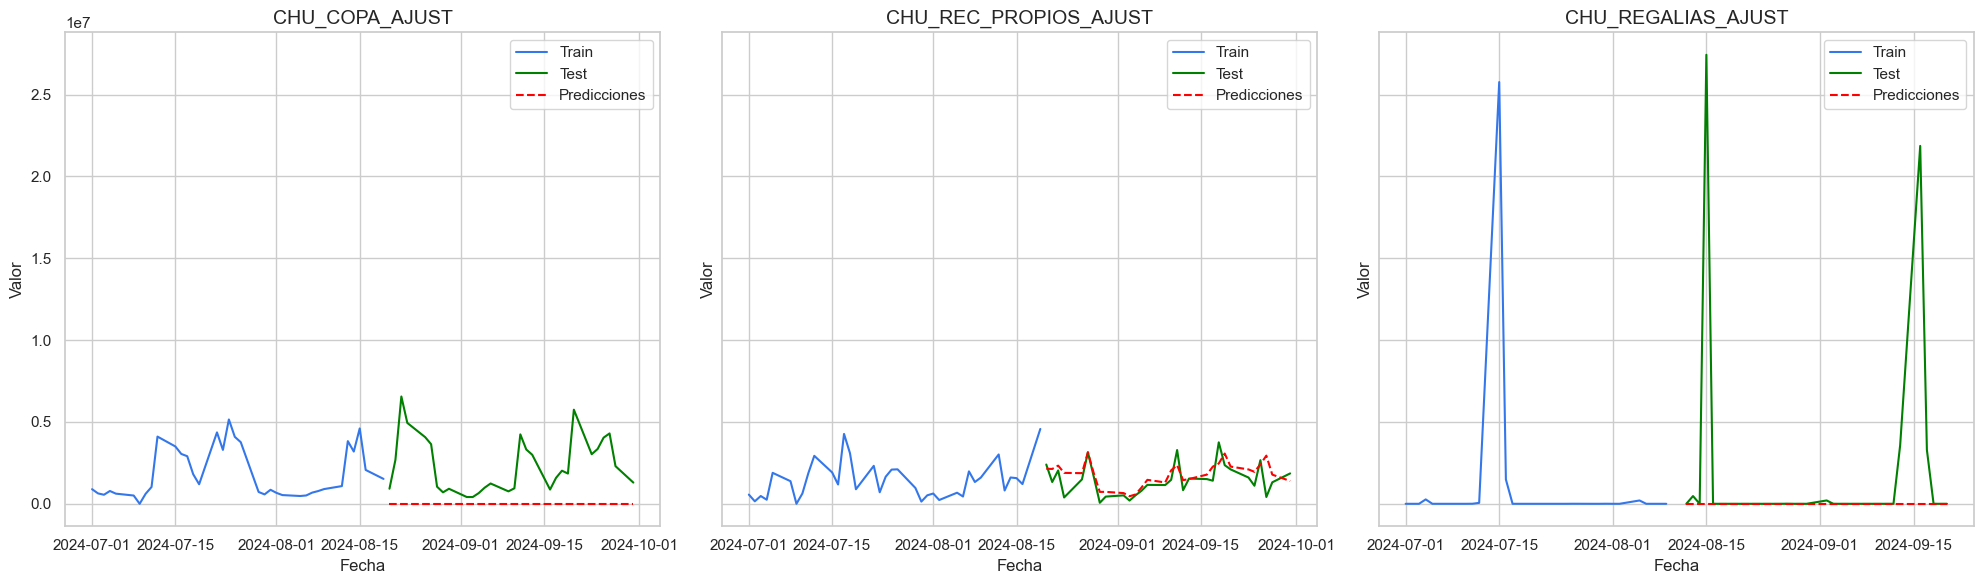

None

In [7]:
pd.options.display.float_format = '{:,.2f}'.format
display(pd.DataFrame(results_train_test))

display(funciones.plot_train_test_predictions(
    dataframes_train=dataframes_train,
    dataframes_test=dataframes_test,
    predictions_test=predictions_test,
    series_names=titulos,
    start_date='2024-07-01'
))

In [6]:
results = pd.DataFrame(results_train_test)

for i, row in results.iterrows():
    display(row["name"])
    print(row.model)

'CHU_COPA_AJUST'

Initiated AutoTS object with best model: 
LastValueNaive
{'fillna': 'quadratic', 'transformations': {'0': 'RollingMeanTransformer', '1': 'AnomalyRemoval', '2': 'bkfilter', '3': 'ScipyFilter'}, 'transformation_params': {'0': {'fixed': True, 'window': 360, 'macro_micro': True, 'center': True}, '1': {'method': 'zscore', 'method_params': {'distribution': 'uniform', 'alpha': 0.05}, 'fillna': 'ffill', 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 7}}}, 'isolated_only': False}, '2': {}, '3': {'method': 'butter', 'method_args': {'N': 2, 'btype': 'highpass', 'analog': False, 'output': 'sos', 'Wn': 0.015384615384615385}}}}
{}
Validation: 0, 1, 2, 3
SMAPE: 80.45022147190438, nan, nan, nan
MAE: 1457881.601770488, 1754848.8054795982, 3351528.787366555, 1944707.5176069036
SPL: 0.18310796907270413, 0.3516077000937226, 1.516704946141438, 0.23639689726808616


'CHU_REC_PROPIOS_AJUST'

Initiated AutoTS object with best model: 
SeasonalityMotif
{'fillna': 'akima', 'transformations': {'0': 'PositiveShift', '1': 'Detrend'}, 'transformation_params': {'0': {}, '1': {'model': 'GLS', 'phi': 1, 'window': 365, 'transform_dict': None}}}
{'window': 15, 'point_method': 'midhinge', 'distance_metric': 'mae', 'k': 20, 'datepart_method': 'simple', 'independent': False}
Validation: 0, 1, 2, 3
SMAPE: 46.63511981455654, 81.92051984679205, 67.9873722891953, 59.817692083104504
MAE: 672472.5785951081, 1013335.51811632, 1024976.4424628529, 665533.8818280211
SPL: 0.14172371881288814, 0.22842532323077214, 0.16493539716519867, 0.16548226664122395


'CHU_REGALIAS_AJUST'

Initiated AutoTS object with best model: 
SeasonalityMotif
{'fillna': 'ffill', 'transformations': {'0': 'CenterLastValue', '1': 'QuantileTransformer'}, 'transformation_params': {'0': {'rows': 6}, '1': {'output_distribution': 'uniform', 'n_quantiles': 1000}}}
{'window': 15, 'point_method': 'midhinge', 'distance_metric': 'mse', 'k': 20, 'datepart_method': 'simple', 'independent': True}
Validation: 0, 1, 2, 3
SMAPE: nan, nan, nan, nan
MAE: 926159.4666666667, 1861666.2666666666, 1564803.1333333333, 2344361.2666666666
SPL: 0.19809204672333816, 0.5484111223643126, 0.21565462335433694, 0.1595456771289861
